In [1]:
import numpy as np
import os
import pandas as pd 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib as plt
%matplotlib inline

In [2]:
df = fetch_california_housing(as_frame=True)
df = df['frame']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212BD8A2760>,
      dtype=object)

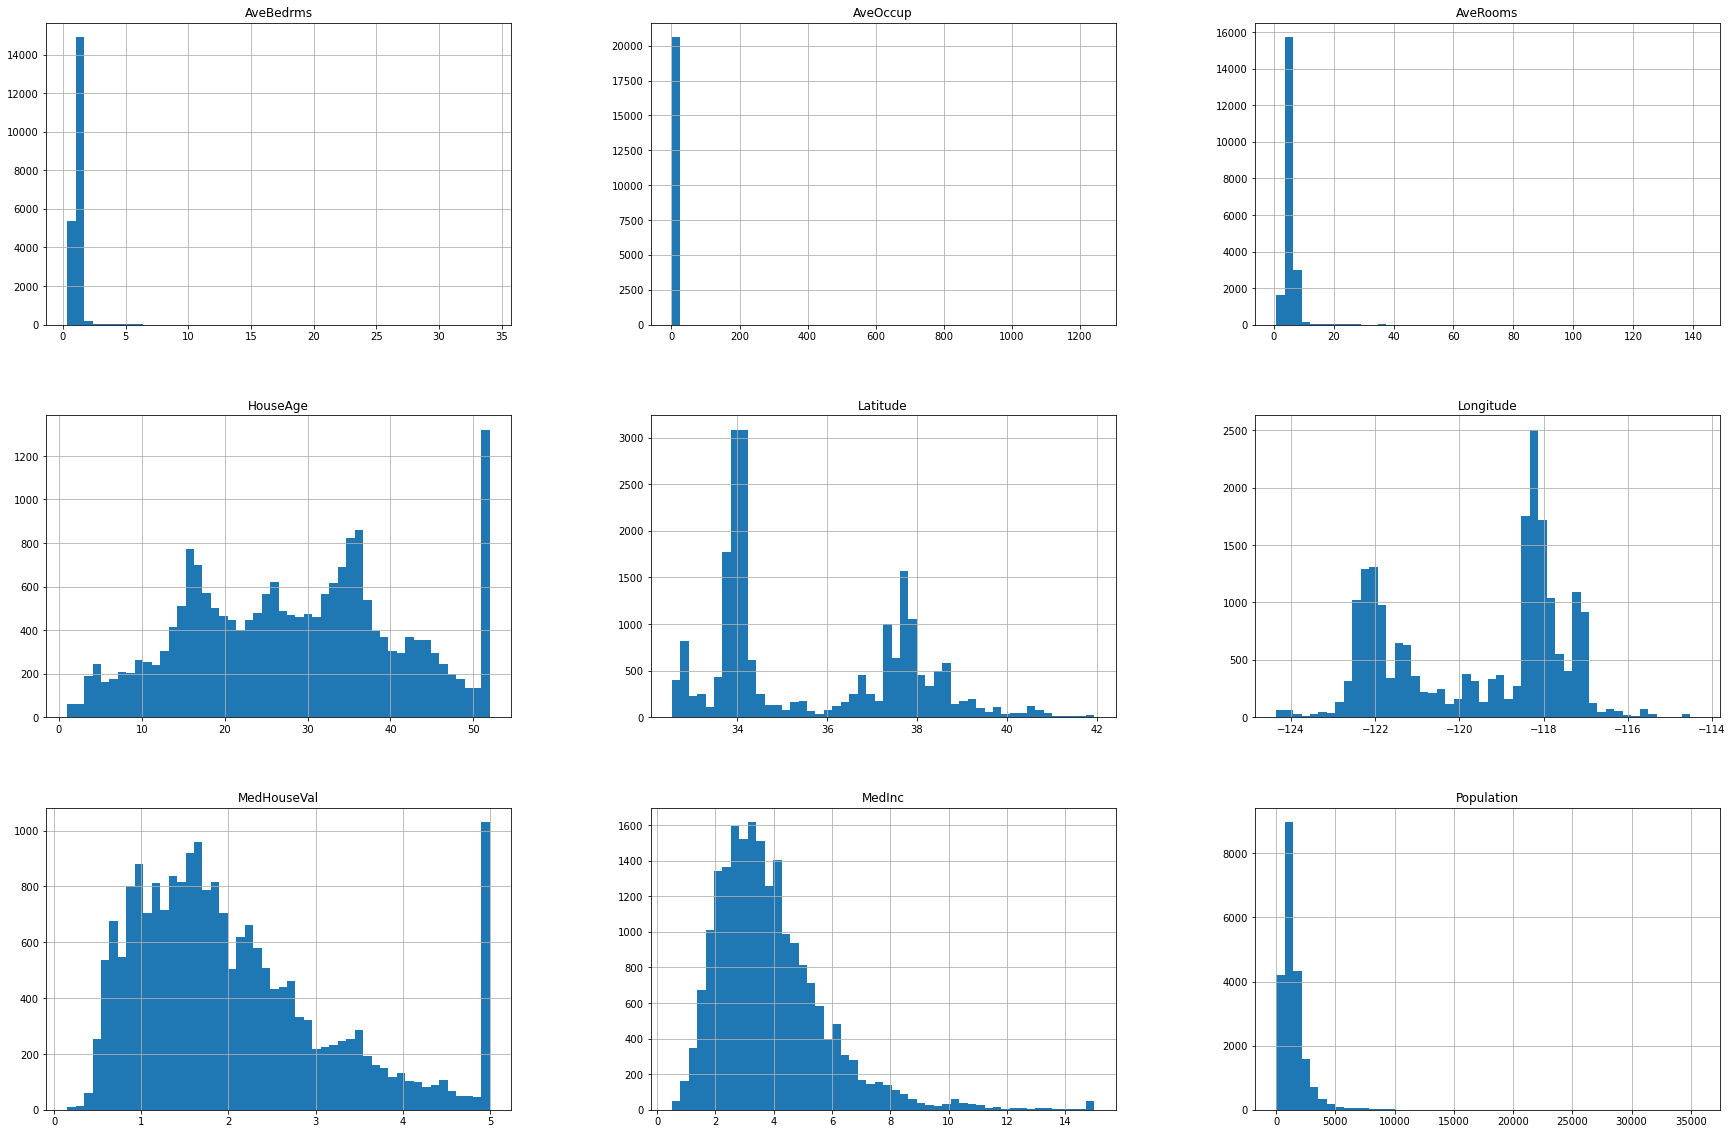

In [6]:
df.hist(bins=50, figsize=(30,20))

In [7]:
df['cat_inc'] = round(df['MedInc']/3)

In [8]:
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 42)

In [9]:
df['cat_inc'].value_counts()/len(df)

1.0    0.668266
2.0    0.246415
0.0    0.039826
3.0    0.034932
4.0    0.007510
5.0    0.003052
Name: cat_inc, dtype: float64

In [10]:
test_data['cat_inc'].value_counts()/len(test_data)

1.0    0.681686
2.0    0.233527
0.0    0.040213
3.0    0.033430
4.0    0.008236
5.0    0.002907
Name: cat_inc, dtype: float64

In [11]:
df['cat_inc'].value_counts()/len(df) - test_data['cat_inc'].value_counts()/len(test_data)

1.0   -0.013421
2.0    0.012888
0.0   -0.000388
3.0    0.001502
4.0   -0.000727
5.0    0.000145
Name: cat_inc, dtype: float64

In [12]:
sss = StratifiedShuffleSplit(n_splits=1 ,test_size=0.2, random_state=42)
for train_index, test_index in sss.split(df, df['cat_inc']):
    train_data, test_data = df.loc[train_index], df.loc[test_index]

In [13]:
test_data['cat_inc'].value_counts()/len(test_data)

1.0    0.668362
2.0    0.246366
0.0    0.039729
3.0    0.034884
4.0    0.007510
5.0    0.003149
Name: cat_inc, dtype: float64

In [14]:
df['cat_inc'].value_counts()/len(df) - test_data['cat_inc'].value_counts()/len(test_data)

1.0   -0.000097
2.0    0.000048
0.0    0.000097
3.0    0.000048
4.0    0.000000
5.0   -0.000097
Name: cat_inc, dtype: float64

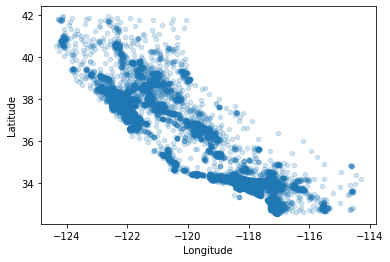

In [15]:
df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2)

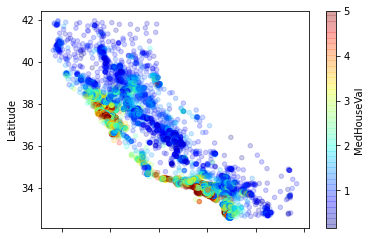

In [16]:
df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, c='MedHouseVal', cmap='jet')

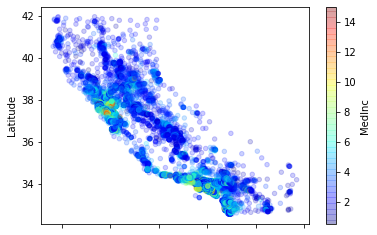

In [17]:
df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, c='MedInc', cmap='jet')

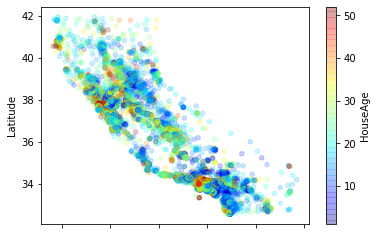

In [18]:
df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, c='HouseAge', cmap='jet')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212C020B580>,
      dtype=object)

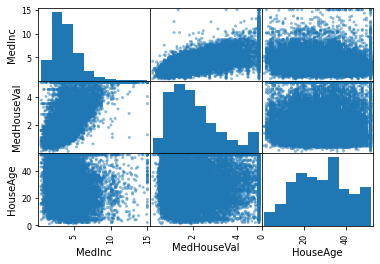

In [19]:
pd.plotting.scatter_matrix(df[['MedInc', 'MedHouseVal', 'HouseAge']])

In [20]:
np.random.seed(42)
cols = test_data.columns
train_data = np.array(train_data)
for i in range(1500):
    train_data[np.random.randint(0, len(train_data))][5] = np.nan
train_data = pd.DataFrame(train_data, columns=cols)
train_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cat_inc
0,4.7933,37.0,6.000000,1.021544,1635.0,2.935368,37.67,-122.14,1.869,2.0
1,1.3750,35.0,4.050847,1.031477,1041.0,2.520581,35.38,-118.97,0.575,0.0
2,2.0147,16.0,4.598997,1.077694,599.0,1.501253,33.18,-117.31,0.877,1.0
3,2.1979,8.0,5.642381,1.131349,5060.0,2.596203,33.79,-116.95,0.953,1.0
4,4.0521,35.0,5.753138,1.041841,1015.0,4.246862,34.03,-117.94,1.518,1.0
...,...,...,...,...,...,...,...,...,...,...
16507,2.6339,41.0,3.775330,0.885463,934.0,4.114537,33.93,-118.20,1.457,1.0
16508,3.3750,30.0,3.992327,0.974425,1104.0,2.823529,33.83,-117.93,2.019,1.0
16509,5.3446,35.0,5.553753,1.032454,1545.0,NaN,37.66,-122.45,2.633,2.0
16510,5.1583,8.0,4.837438,1.017241,913.0,2.248768,33.68,-117.81,1.922,2.0


In [21]:
y = train_data['MedHouseVal']
X = train_data.drop('MedHouseVal', axis=1)

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      16512 non-null  float64
 1   HouseAge    16512 non-null  float64
 2   AveRooms    16512 non-null  float64
 3   AveBedrms   16512 non-null  float64
 4   Population  16512 non-null  float64
 5   AveOccup    15080 non-null  float64
 6   Latitude    16512 non-null  float64
 7   Longitude   16512 non-null  float64
 8   cat_inc     16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [23]:
pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ("scaler", StandardScaler())])

In [24]:
X = pipeline.fit_transform(X)

In [26]:
cols = cols.drop('MedHouseVal')

KeyError: "['MedHouseVal'] not found in axis"

In [27]:
X = pd.DataFrame(X, columns=cols)

In [28]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,cat_inc
0,0.485229,0.665159,0.241349,-0.173905,0.183893,-0.012091,0.954686,-1.284677,1.032343
1,-1.313260,0.506085,-0.579297,-0.150795,-0.336368,-0.076663,-0.117253,0.298814,-1.964764
2,-0.976691,-1.005118,-0.348511,-0.043271,-0.723499,-0.235347,-1.147063,1.128024,-0.466211
3,-0.880303,-1.641414,0.090781,0.081558,3.183714,-0.064891,-0.861525,1.307852,-0.466211
4,0.095257,0.506085,0.137413,-0.126683,-0.359141,0.192076,-0.749182,0.813324,-0.466211
...,...,...,...,...,...,...,...,...,...
16507,-0.650908,0.983307,-0.695297,-0.490499,-0.430085,0.171476,-0.795992,0.683447,-0.466211
16508,-0.260989,0.108400,-0.603936,-0.283528,-0.281189,-0.029502,-0.842801,0.818319,-0.466211
16509,0.775287,0.506085,0.053467,-0.148521,0.105065,-0.030672,0.950005,-1.439529,1.032343
16510,0.677268,-1.641414,-0.248121,-0.183915,-0.448479,-0.118977,-0.913015,0.878262,1.032343


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [31]:
some_data = df[1:5]
some_data_labels = some_data['MedHouseVal']
some_data = some_data.drop('MedHouseVal', axis=1)

In [32]:
y_some = pipeline.transform(some_data)

In [33]:
some_data_labels

1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [34]:
print('Прогнозы: ', lin_reg.predict(y_some))
print('Реальность: ', list(some_data_labels))

Прогнозы:  [3.96878502 3.68067365 3.2372253  2.41856573]
Реальность:  [3.585, 3.521, 3.413, 3.422]


In [35]:
mean_squared_error(list(some_data_labels), lin_reg.predict(y_some))

0.30264092156789957

In [77]:
scores = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)

In [78]:
lin_scores = np.sqrt(-scores)
print(lin_scores.mean(),lin_scores.std())

0.9023074684075347 0.36284371675955873


In [40]:
lin_reg.coef_

array([ 0.87606763,  0.11659234, -0.28428689,  0.32380612, -0.00408137,
       -0.02673663, -0.89929018, -0.87114187, -0.03846369])

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

DecisionTreeRegressor()

In [43]:
print('Прогнозы: ', tree_reg.predict(y_some))
print('Реальность: ', list(some_data_labels))

Прогнозы:  [3.585 3.711 3.413 3.422]
Реальность:  [3.585, 3.521, 3.413, 3.422]


In [44]:
mean_squared_error(list(some_data_labels), tree_reg.predict(y_some))

0.009024999999999995

In [37]:
from sklearn.model_selection import cross_val_score

In [45]:
scores = cross_val_score(tree_reg, X, y, scoring='neg_mean_squared_error', cv=10)

In [46]:
tree_scores = np.sqrt(-scores)

In [47]:
tree_scores.mean()

0.7316072096599942

In [48]:
tree_scores.std()

0.02360353035850328

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X, y)

RandomForestRegressor()

In [51]:
print('Прогнозы: ', forest_reg.predict(y_some))
print('Реальность: ', list(some_data_labels))

Прогнозы:  [3.8755909 4.0529612 3.4650402 2.9490801]
Реальность:  [3.585, 3.521, 3.413, 3.422]


In [52]:
mean_squared_error(list(some_data_labels), forest_reg.predict(y_some))

0.14844680092507492

In [53]:
scores = cross_val_score(forest_reg, X, y, scoring='neg_mean_squared_error', cv=3)

In [58]:
tree_scores = np.sqrt(-scores)
print(tree_scores.mean(),tree_scores.std())

0.523955335345004 0.006764560449155647


In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8]},
              {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}]

grid_search = GridSearchCV(forest_reg, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [56]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [57]:
cvres = grid_search.cv_results_
for mean_res, param in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_res), param)

0.6221570820963637 {'max_features': 2, 'n_estimators': 3}
0.5563731781325051 {'max_features': 2, 'n_estimators': 10}
0.5352364523178897 {'max_features': 2, 'n_estimators': 30}
0.615639118690682 {'max_features': 4, 'n_estimators': 3}
0.5512088246879079 {'max_features': 4, 'n_estimators': 10}
0.5292941416437773 {'max_features': 4, 'n_estimators': 30}
0.6290947122228837 {'max_features': 6, 'n_estimators': 3}
0.549801897664835 {'max_features': 6, 'n_estimators': 10}
0.5299853542787464 {'max_features': 6, 'n_estimators': 30}
0.6183953404866108 {'max_features': 8, 'n_estimators': 3}
0.5493920183117962 {'max_features': 8, 'n_estimators': 10}
0.52832649184351 {'max_features': 8, 'n_estimators': 30}
0.6357217012782838 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.5503465708759597 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.6201479579019294 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.5405447140715209 {'bootstrap': False, 'max_features': 3, 'n_est

In [58]:
final_model = grid_search.best_estimator_

In [59]:
X_test = test_data.drop('MedHouseVal', axis=1)
y_test = test_data['MedHouseVal']
X_test = pipeline.transform(X_test)
X_test_pred = final_model.predict(X_test)
final_mse = mean_squared_error(X_test_pred, y_test)
np.sqrt(final_mse)

0.5090197951236022

In [61]:
import joblib

In [65]:
joblib.dump(final_model, 'final_model.joblib')

['final_model.joblib']

In [66]:
final_maodel2 = joblib.load('final_model.joblib')

In [67]:
X_test_pred2 = final_maodel2.predict(X_test)
final_mse2 = mean_squared_error(X_test_pred2, y_test)
np.sqrt(final_mse2)

0.5090197951236022

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
from sklearn.svm import SVR

In [69]:
svr_model = SVR()

In [70]:
svr_model.fit(X, y)

SVR()

In [72]:
scores_svr = cross_val_score(svr_model, X, y, scoring='neg_mean_squared_error', cv=5)
svr_scores = np.sqrt(-scores_svr)
print(svr_scores.mean(),svr_scores.std())

0.5957375160873098 0.005159943920142635


In [87]:
params = [{'kernel':['linear'], 'C': [0.01, 0.1, 1, 2, 5]},
          {'kernel':['rbf'], 'C': [0.01, 0.1, 1, 2], 'gamma': ['scale', 'auto', 0.1]}]


rand_search = GridSearchCV(svr_model, params)
rand_search.fit(X, y)

KeyboardInterrupt: 

In [ ]:
svr_model2 = SVR(kernel='poly')
svr_model2.fit(X,y)

In [93]:
scores_svr = cross_val_score(svr_model2, X, y, scoring='neg_mean_squared_error', cv=3)
svr_scores = np.sqrt(-scores_svr)
print(svr_scores.mean(),svr_scores.std())

1.1271081202909357 0.28019554608553293
